<a href="https://colab.research.google.com/github/NDsasuke/Autocorrelation-function-Diagnostics-and-prediction/blob/main/Diagnostics%20and%20prediction/Residual%20Analysis/Linear_Regression_Residual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Importing necessary libraries**: This segment imports the required libraries for the analysis, including `numpy` for numerical computations, `pandas` for data handling, and `matplotlib.pyplot` for data visualization. It also imports specific functions/classes such as `fetch_california_housing` from `sklearn.datasets`, `LinearRegression` from `sklearn.linear_model`, and `mean_squared_error` from `sklearn.metrics`.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


2. **Load the California Housing dataset**: The code uses the `fetch_california_housing` function to load the California Housing dataset. It retrieves the data and target variables, as well as the feature names.


In [15]:

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
feature_names = data.feature_names


3. **Fit a linear regression model**: An instance of the `LinearRegression` class is created, and the model is fitted to the data using the `fit` method. This step trains the linear regression model on the California Housing dataset.


In [16]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()


4. **Predict the target variable**: The code uses the trained model to make predictions on the input data `X`. The predicted values are stored in the variable `y_pred`.


In [17]:
# Predict the target variable
y_pred = model.predict(X)


5. **Calculate residuals**: The residuals are computed by subtracting the predicted values `y_pred` from the actual target values `y`. The resulting residuals are stored in the variable `residuals`.


In [18]:
# Calculate residuals
residuals = y - y_pred


6. **Plotting the residuals**: This segment visualizes the residuals using a scatter plot. It plots the predicted values on the x-axis and the corresponding residuals on the y-axis. A red dashed line at y=0 represents the ideal scenario where residuals are centered around zero.


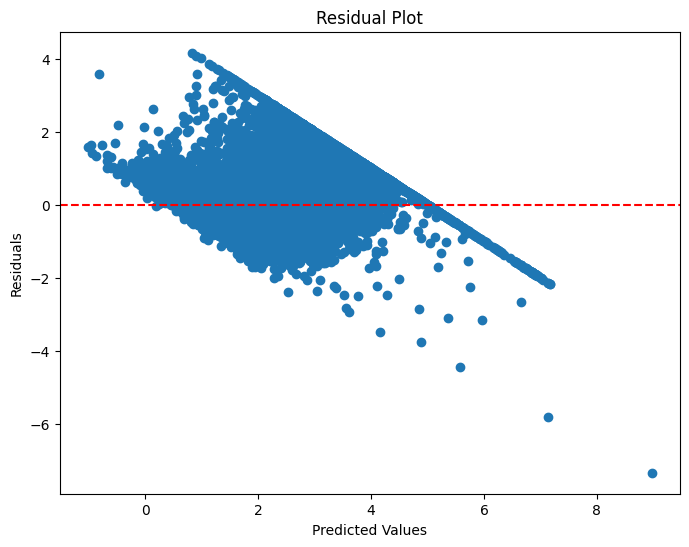

In [19]:
# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



7. **Checking assumptions: Linearity**: This code segment checks the linearity assumption of the linear regression model. It plots the predicted values (`y_pred`) against the actual values (`y`) using a scatter plot. The red dashed line represents the perfect alignment where predicted values equal actual values.


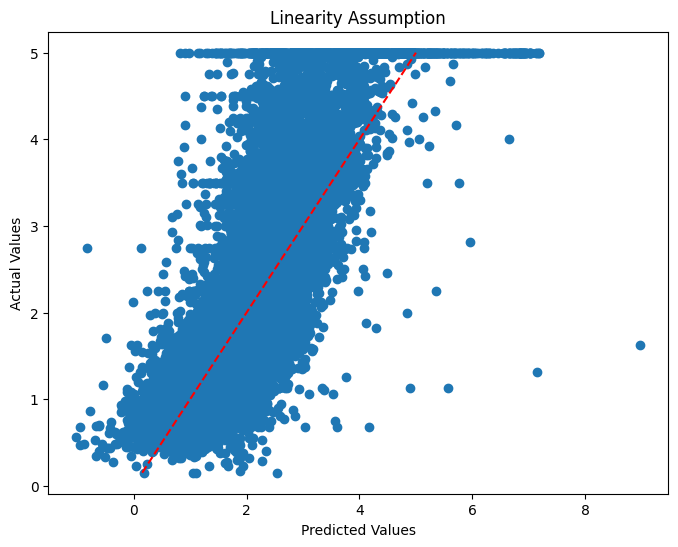

In [20]:
# Checking assumptions
# 1. Linearity assumption
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Assumption')
plt.show()



8. **Checking assumptions: Homoscedasticity**: The code checks the homoscedasticity assumption, which assumes that the residuals have constant variance across the predicted values. It plots the residuals against the predicted values using a scatter plot. The red dashed line at y=0 indicates the ideal scenario where residuals are symmetrically distributed around zero.


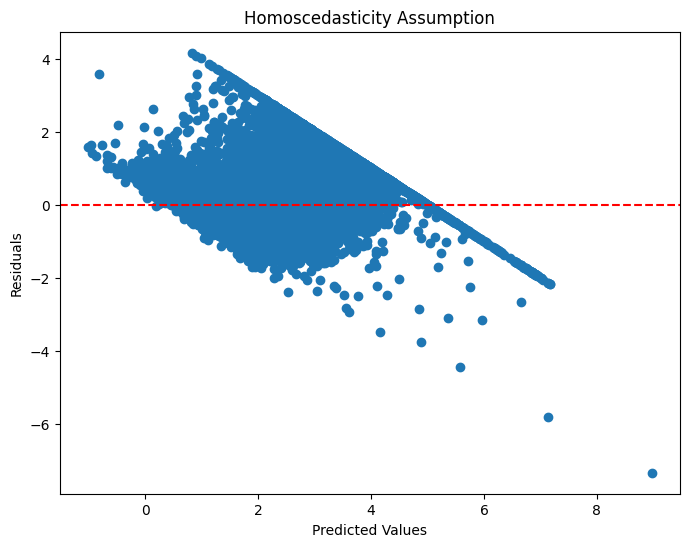

In [21]:
# 2. Homoscedasticity assumption
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Assumption')
plt.show()



9. **Checking assumptions: Normality**: This segment examines the normality assumption of the residuals. It creates a histogram of the residuals, displaying the frequency distribution. The plot should ideally resemble a bell-shaped curve if the assumption holds.


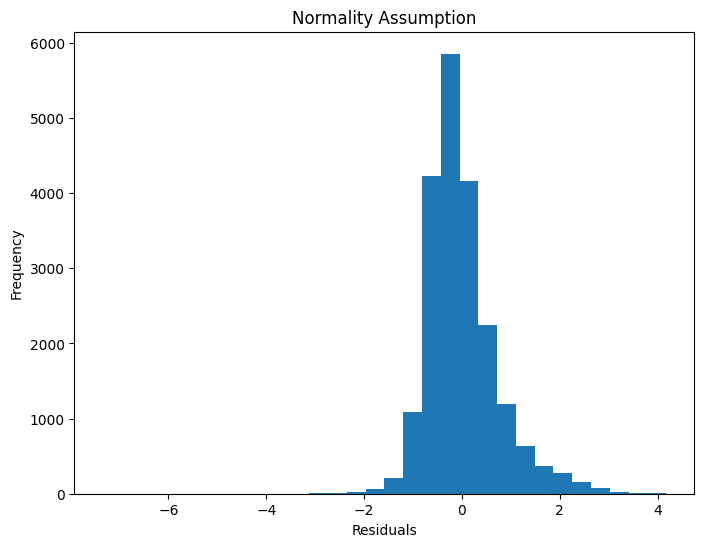

In [22]:
# 3. Normality assumption
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality Assumption')
plt.show()



10. **Identifying outliers**: The code identifies outliers by comparing the absolute values of the residuals with twice the standard deviation of the residuals. Outliers are identified if their absolute values exceed the threshold. The indices of the outliers are stored in the `outlier_indices` variable.


In [23]:
# Identifying outliers
outliers = np.abs(residuals) > 2 * np.std(residuals)
outlier_indices = np.where(outliers)[0]
print("Outlier indices:", outlier_indices)

Outlier indices: [   60    61    89 ... 20527 20533 20578]



11. **Assessing model fit: Mean Squared Error (MSE)**: The mean squared error is calculated as a measure of model fit. It computes the average squared difference between the predicted values (`y_pred`) and the actual values (`y`). The resulting MSE is stored in the `mse` variable.


In [24]:
# Assessing model fit
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.5243209861846072
